Steps
Import libraries

1.Load / create dataset (X features, y labels)

2.Split or make evaluation plan
Bootstrap → resample many times
Stratified K-Fold → cross-validation
Train/Test split → normal evaluation

3.Create model → RandomForestClassifier(...)

4.Train → model.fit(X_train, y_train)

5.Predict → y_pred = model.predict(X_test)

6.Evaluate
accuracy_score
classification_report (precision, recall, f1)

7.Print results / average score

SVM-3, 21, 26, 29, 41, 42, 43, 70 

In [1]:
# 3.Implement a Decision Tree Classifier and compare its performance with a SVM Classifier on the iris dataset.
# Display the accuracy of both models
#import libraries
from sklearn.datasets import load_iris,make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#Load data
iris=load_iris()
X=iris.data
y=iris.target 

#Split data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3 ,random_state=42)

In [2]:
#Model 1:Decision Tree Classifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("accuracy score of Decision Tree",accuracy_score(y_test,dt_pred))

accuracy score of Decision Tree 0.9777777777777777


In [3]:
#Model 2:SVC
svc=SVC(kernel="linear",random_state=42)
svc.fit(X_train,y_train)
svc_pred=dt.predict(X_test)
print("accuracy score of Decision Tree",accuracy_score(y_test,svc_pred))

accuracy score of Decision Tree 0.9777777777777777


In [4]:
# 21.Write a Python code to perform k-fold cross-validation on the dataset using a Support Vector Machine
# (SVM) classifier. Use the following steps:
# • Import necessary libraries.
# • Prepare the dataset synthetically using make_classification.
# • Preprocess the data if necessary (e.g., scaling).
# • Implement k-fold cross-validation with 10 folds.
# • Train the SVM classifier on the training set and evaluate it on the test set for each fold.
# • Print the accuracy for each fold and the average accuracy across all folds.
# Dataset Description:
# • The dataset consists of 100 samples with 20 features.
# The target variable is binary (0 or 1).


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
# Prepare the dataset synthetically using make_classification.
X,y=make_classification(n_samples=100,n_features=20,n_classes=2)

#Preprocess the data 
std=StandardScaler()
X=std.fit_transform(X)


In [6]:
#KFold cross validation 
kfold=KFold(n_splits=10,shuffle=True, random_state=42)
fold_acc=[]

for fold,(train_idx,test_idx) in enumerate(kfold.split(X),1):
    X_train,X_test=X[train_idx],X[test_idx]
    y_train,y_test=y[train_idx],y[test_idx]

    # model
    svc=SVC(random_state=42)
    svc.fit(X_train,y_train)
    svc_pred=svc.predict(X_test)

    svc_acc=accuracy_score(y_test,svc_pred)
    fold_acc.append(svc_acc)
    
    print(f"Accuracy for fold {fold}: {svc_acc:.4f}")

Accuracy for fold 1: 0.8000
Accuracy for fold 2: 0.9000
Accuracy for fold 3: 1.0000
Accuracy for fold 4: 1.0000
Accuracy for fold 5: 0.9000
Accuracy for fold 6: 0.6000
Accuracy for fold 7: 0.8000
Accuracy for fold 8: 0.8000
Accuracy for fold 9: 0.9000
Accuracy for fold 10: 1.0000


In [7]:
average_accuracy = np.mean(fold_acc)
print(f"\nAverage Accuracy across 10 folds: {average_accuracy:.4f}")



Average Accuracy across 10 folds: 0.8700


In [8]:
#26 Write a Python code to perform a Grid Search with Cross-Validation on the Iris dataset using a Support
#Vector Machine (SVM) classifier. The goal is to find the best hyperparameters for the SVM model.
# Dataset Description:
# • The Iris dataset consists of 150 samples with 4 features.
# • The target variable is categorical with three classes (Setosa, Versicolor, Virginica).
# Instructions:
# • Import the necessary libraries.
# • Load the Iris dataset from sklearn.datasets.
# • Split the dataset into features and labels.
# • Implement a Grid Search with 5-fold Cross-Validation to find the best hyperparameters for the
# SVM classifier. Consider the following hyperparameters: C: [0.1, 1, 10, 100] kernel: ['linear', 'rbf']
# gamma: ['scale', 'auto']
# • Print the best hyperparameters found by the Grid Search.
# • Evaluate the best model on the entire dataset and print the accuracy.
# Generate and visualize the confusion matrix for the best model.

In [9]:
iris=load_iris()
X=iris.data
y=iris.target

In [10]:
from sklearn.model_selection import GridSearchCV
# 2. Define Param Grid
param_grid = {
 'C': [0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf'],
 'gamma': ['scale', 'auto']
}



In [11]:
# 3. Grid Search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X, y)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [12]:
print("Best Parameters:", grid.best_params_)
print("Best Accuracy: ", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy:  0.9800000000000001


In [13]:
#29 You are using a Support Vector Machine (SVM) classifier for a dataset that has 3 features and 500 data
# points. 
# If you increase the dimensionality from 3 features to 12 features, explain how the volume of the feature
# space changes. What are the potential challenges that arise from this increase in dimensionality?
# Instructions:
# • Provide detailed answers to both questions, incorporating concepts from machine learning and
# geometry.
# • Use diagrams or examples where appropriate to illustrate your points.
# Discuss the implications of high-dimensional spaces on model performance, including overfitting,
# computational complexity, and the curse of dimensionality

In [14]:
print("Q29 Answer:")
print("1. Volume Increase: As dimensions increase, the volume of the feature space")
print(" increases exponentially. Points become sparse.")
print("2. Challenges:")
print(" - Sparsity: Data points are too far apart for local methods (like k-NN) to work well.")
print(" - Overfitting: Models can easily find random patterns in the noise.")
print(" - Computation: Distance calculations become expensive.")


Q29 Answer:
1. Volume Increase: As dimensions increase, the volume of the feature space
 increases exponentially. Points become sparse.
2. Challenges:
 - Sparsity: Data points are too far apart for local methods (like k-NN) to work well.
 - Overfitting: Models can easily find random patterns in the noise.
 - Computation: Distance calculations become expensive.


In [15]:
#41 Consider Social_Netwok_Ads.csv dataset - (UserID, Gender, Age, EstimatedSalary, Purchased).
# Use Age and EstimatedSalary as input features and Purchased as target feature. Split test data set
# 30% of complete dataset. Build two models of support vector classifier in python using sklearn
# library, one for linear and another for RBF kernel with C and gamma parameters set. Predict test
# labels and print test accuracy.

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#Load data
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
#Laod data
df=pd.read_csv('Social_Network_Ads.csv')
X=df[["Age","EstimatedSalary"]]
y=df['Purchased']

# Split X,y 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [17]:
#Fearure Scaling 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
#Model 1:Linear Kernel SVC

svc_linear=SVC(kernel="linear", C=1.0, random_state=42)
svc_linear.fit(X_train,y_train)
y_pred_linear=svc_linear.predict(X_test)

acc_linear=accuracy_score(y_test,y_pred_linear)
print("Linear SVC Test Accuracy:", acc_linear)

Linear SVC Test Accuracy: 0.85


In [19]:
#Model 2:RBf Kernel SVC

svc_rbf=SVC(kernel="rbf", C=1.0, random_state=42)
svc_rbf.fit(X_train,y_train)
y_pred_rbf=svc_rbf.predict(X_test)

acc_rbf=accuracy_score(y_test,y_pred_rbf)
print("RBF SVC Test Accuracy:", acc_rbf)

RBF SVC Test Accuracy: 0.9416666666666667


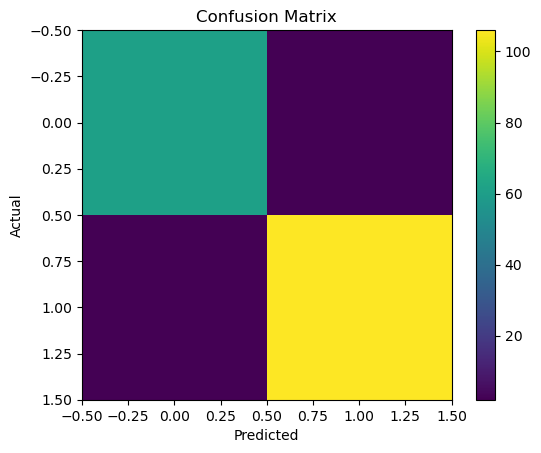

In [23]:
# Develop a Support Vector Classifier to predict whether a tumor is malignant or benign based on 30
# features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The
# dataset contains 569 samples with binary labels indicating tumor type. (breast_cancer dataset of
# sklearn) Load the Dataset from sklearn.Split the dataset into training and testing sets.Train the SVC
# Model using the training data. Visualize the Results.

from sklearn.datasets import load_breast_cancer
# 1) Load dataset
data=load_breast_cancer()
X=data.data
y=data.target

#Split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svc=SVC(kernel='linear',C=1.0,random_state=42)
svc.fit(X_train_s,y_train)

y_pred = svc.predict(X_test_s)

# 6) Confusion Matrix visualization
cm=confusion_matrix(y_test,y_pred)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

In [24]:
# 43.Write a Python program to implement SVM classification for breast cancerprediction with the
# following requirements: Data preprocessing using StandardScaler use kernel parameters for tuning.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
# Use Pipeline for scaling + model
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma='auto'))
pipe.fit(X_train, y_train)
print(f"Tuned SVM Accuracy: {pipe.score(X_test, y_test):.4f}")

Tuned SVM Accuracy: 0.9825


In [ ]:
#70 Implement an SVC model to classify iris flowers into three species (Setosa, Versicolor, and
# Virginica) based on their sepal and petal dimensions. The dataset contains 150 samples with four
# features: sepal length, sepal width, petal length, and petal width. Load the Dataset from
# sklearn.Split the dataset into training and testing sets.Train the SVC Model using the training data.
# Visualize the Results.